Caso de estudio: Segmentación un mercado de adolescentes
===

En este tutorial se aplica el algoritmo K-means para clasificar un grupo de adolecentes con base en sus intéreses, con el fin de diseñar estrategias publicitarias y servicios encaminados a cada grupo de interés.

Descripción del problema
---

Un vendedor desea enviar publicidad electrónica a una población de adolecentes y adultos jóvenes con el fin de maximizar sus ventas. Para ello, desea poder clasificar a sus clientes potenciales por grupos de interés de acuerdo con sus intereses y consecuentemente enviar publicidad específica a cada uno de ellos.   

En este problema se desea determina que grupos de interés existen en una población de clientes a partir de los mensajes enviados por un servicio de redes sociales. La información disponible consiste en 30000 observaciones de 40 variables que podrían caracterizar los intereses de la población analizada. Estas variables corresponden a palabras que pueden asociarse a un interés de la poblaión analizada. Cada variable mide la frecuencia con que una determinada palabra aparece en los mensajes de texto; adicionalmente, dentro de estas variables se incluye  información como el sexo, la edad y la cantidad de contactos de la persona. 

Carga de los datos
---

In [1]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/snsdata.csv",
    sep=",",
    thousands=None,
    decimal=".",
    encoding="latin-1",
)

df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Análisis exploratorio
---

In [2]:
#
# Número de registros
#
len(df)

30000

**Columna "gender"**

In [3]:
#
# Valores diferentes de NA
#
df.gender.value_counts()

gender
F    22054
M     5222
Name: count, dtype: int64

In [4]:
#
# Número de registros con NA
#
df.gender.isna().sum()

2724

**Columna "age"**

In [5]:
#
# La muestra contiene un rango de edades
# por fuera de la población de interés
#
df.age.describe()

count    24914.000000
mean        17.993950
std          7.858054
min          3.086000
25%         16.312000
50%         17.287000
75%         18.259000
max        106.927000
Name: age, dtype: float64

In [6]:
#
# Cantidad de nulos en la columna age
#
df.age.isnull().sum()

5086

Imputación de valores faltantes
---

In [7]:
#
# Se calcula una tabla para determinar
# la edad promedio por año de graduación
#
df.groupby("gradyear")["age"].mean()

gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

In [8]:
from sklearn.impute import KNNImputer

df_train = df[["age", "gradyear"]]

knnImputer = KNNImputer()
knnImputer.fit(df_train)
df["age"] = knnImputer.transform(df_train)[:, 0]

df.age.isna().sum()

0

Selección del conjunto de datos de interés
---

In [9]:
#
# Se seleccionan las personas entre 13 y 20 años y
# se descartan las demás observaciones
#
df = df[df["age"] >= 13]
df = df[df["age"] < 20]

Selección del dataset
---

In [10]:
#
# Se separa la información de las palabras relacionadas
# con los intereses del resto de la información
#
interests = df.iloc[:, 4:].copy()
interests.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


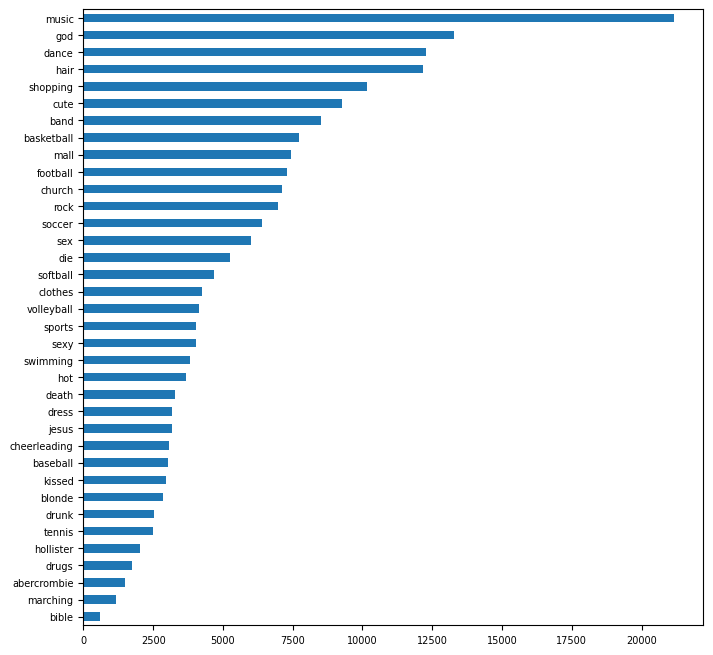

In [11]:
import matplotlib.pyplot as plt

interests.sum().sort_values(ascending=True).plot(kind="barh", figsize=(8, 8))
plt.gca().tick_params(axis="both", which="major", labelsize=7)

In [12]:
#
# Escalamiento
#
from sklearn.preprocessing import MinMaxScaler

interests_z = MinMaxScaler().fit_transform(interests)

Determinación de la cantidad óptima de clusters
----

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = 20
scores = []

for n in range(2, n_clusters):
    kmeans = KMeans(n_clusters=n, n_init="auto")
    kmeans.fit(interests_z)
    labels = kmeans.labels_
    scores.append(silhouette_score(interests_z, labels, metric="euclidean"))

scores

[0.38059898662367925,
 0.35856641072075157,
 0.29406654225302137,
 0.2834605320775909,
 0.22342403731277907,
 0.1917352540322325,
 0.18855385104041447,
 0.1646267174723548,
 0.18253037136187097,
 0.1588321381284319,
 0.17706041467378544,
 0.1664666998495462,
 0.19832501723172502,
 0.20321146988970099,
 0.1777772496138276,
 0.2392169673873184,
 0.17838059137175752,
 0.18021285527105607]

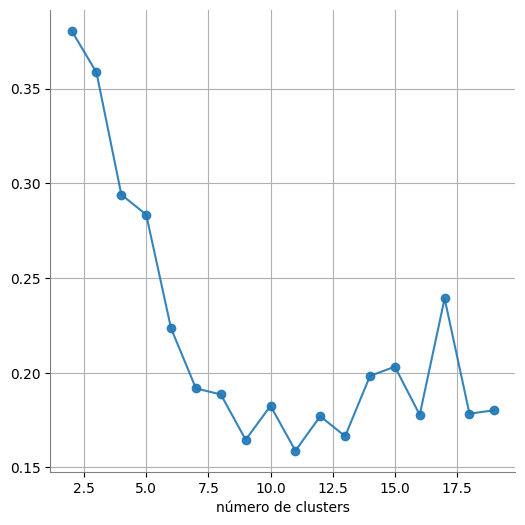

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.plot(range(2, n_clusters), scores, marker="o", color="tab:blue", alpha=0.9)
plt.xlabel("número de clusters")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid()
plt.show()

Evaluación del modelo
---

In [15]:
#
# Número de patrones asignados a cada cluster
#
kmeans = KMeans(n_clusters=5, n_init="auto")
kmeans.fit(interests_z)

(pd.DataFrame(kmeans.predict(interests_z)))[0].value_counts()

0
1    21753
4     4123
2     1293
3      715
0      494
Name: count, dtype: int64

In [16]:
#
# Frecuencia de las palabras en cada cluster
#
clusters = pd.DataFrame(
    kmeans.cluster_centers_,
    index=["Cluster {}".format(i) for i in range(5)],
    columns=interests.columns,
).transpose()

clusters.style.background_gradient("Blues")

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
basketball,0.036775,0.008622,0.019206,0.029720,0.017115
football,0.028205,0.013930,0.026605,0.027972,0.028015
soccer,0.009372,0.007099,0.010025,0.012225,0.013534
softball,0.273637,0.003916,0.008234,0.020156,0.007446
volleyball,0.026894,0.003336,0.007623,0.236464,0.007621
swimming,0.006138,0.003344,0.005813,0.006948,0.008534
cheerleading,0.012596,0.004975,0.021999,0.012432,0.046180
baseball,0.014929,0.005870,0.009232,0.008654,0.008881
tennis,0.004993,0.005238,0.005826,0.007366,0.008729
sports,0.036437,0.009589,0.013792,0.026457,0.017924


In [17]:
for col in clusters.columns:
    words = clusters[col].sort_values(ascending=False)
    for word in words.index[:5]:
        print(word, end=",  ")
    print()

softball,  shopping,  basketball,  sports,  football,  
football,  cute,  shopping,  dance,  music,  
mall,  shopping,  cute,  clothes,  dress,  
volleyball,  shopping,  basketball,  football,  sports,  
shopping,  clothes,  cute,  cheerleading,  dress,  
